## SVM

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [14]:
from sklearn import neighbors
df = pd.read_csv('./bill_authentication.csv')

In [15]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
df.dropna(inplace=True)

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [18]:
# standardize X
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
print(X)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True)


In [20]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = clf.predict(X_test)

In [22]:
# Calculate the training accuracy of the model
clf.score(X_train, y_train)

0.98359161349134

In [23]:
# Calculate the test accuracy of the model
clf.score(X_test, y_test)

0.9890909090909091

In [25]:
## accuracy##
clf.score(X_test, y_test)
## confusion_matrix (混淆矩阵) & F1 score ##
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)
print("f1", f1)

[[147   3]
 [  0 125]]
accuracy 0.9890909090909091
precision 0.9765625
recall 1.0
f1 0.9881422924901185


Task 1

In [30]:
df_task1 = pd.read_csv('./haberman.csv',header=None)
df_task1.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [31]:
df_task1.dropna(inplace=True)

X_task1 = df_task1.iloc[:, :-1].values
y_task1 = df_task1.iloc[:, -1].values

In [32]:
from sklearn.model_selection import train_test_split
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(X_task1, y_task1, test_size=0.20, shuffle= True)

In [35]:
from sklearn.svm import SVC
clf_task1 = SVC(kernel='linear')
clf_task1.fit(X_train_task1, y_train_task1)

SVC(kernel='linear')

In [36]:
y_pred_task1 = clf_task1.predict(X_test_task1)

In [37]:
from sklearn import metrics
accuracy_task1 = metrics.accuracy_score(y_test_task1, y_pred_task1)
precision_task1 = metrics.precision_score(y_test_task1, y_pred_task1)
recall_task1 = metrics.recall_score(y_test_task1, y_pred_task1)
f1_task1 = metrics.f1_score(y_test_task1, y_pred_task1)
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)
print("f1", f1)

accuracy 0.9890909090909091
precision 0.9765625
recall 1.0
f1 0.9881422924901185


## Task 2

In [40]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [41]:
df1 = pd.read_csv("./points.csv")

In [42]:
df1

,Unnamed: 0,x1,x2,class
0,0,-1.563662,-0.954796,0
1,1,-1.209829,1.595268,0
2,2,-0.894269,1.601064,0
3,3,0.584755,-0.170707,1
4,4,0.162367,-0.521749,1
...,...,...,...,...
195,195,-0.272362,0.287633,1
196,196,-0.352195,1.065348,1
197,197,-0.872550,-1.434816,0
198,198,-0.225851,0.365189,1


In [43]:
X1 = df1.iloc[:, 1:-1].values
y1 = df1.iloc[:, -1].values

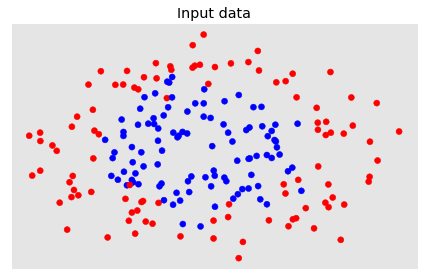

In [48]:
from matplotlib.colors import  ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot()

ax.set_title("Input data")
# Plot the training points
ax.scatter(X1[:,0], X1[:,1], c=y1, cmap=cm_bright)
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.20, shuffle= True)


In [54]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(kernel='rbf'), param_grid={"C":[0.1, 1, 10], "gamma": [1, 0.1, 0.01]}, cv=5)
grid.fit(X_train_1, y_train_1)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.91


In [55]:
# Build a RBF SVM model with best parameters
clf = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])

# Fit the model
clf.fit(X_train_1, y_train_1)

SVC(C=1, gamma=0.1)

In [58]:
# Prediction
y_pred_1 = clf.predict(X_test_1)

In [59]:
#evaluation
from sklearn import metrics
accuracy_1 = metrics.accuracy_score(y_test_1, y_pred_1)
precision_1 = metrics.precision_score(y_test_1, y_pred_1)
recall_1 = metrics.recall_score(y_test_1, y_pred_1)
f1_1 = metrics.f1_score(y_test_1, y_pred_1)

print("accuracy_1", accuracy_1)
print("precision_1", precision_1)
print("recall_1", recall_1)
print("f1_1", f1_1)

accuracy_1 0.925
precision_1 0.9523809523809523
recall_1 0.9090909090909091
f1_1 0.9302325581395349


## visualization

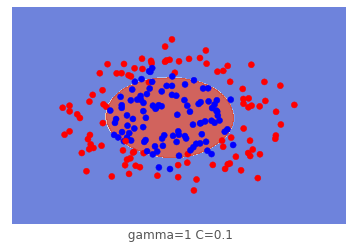

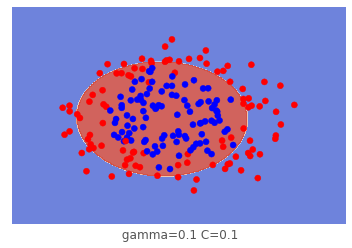

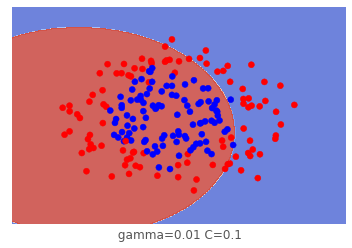

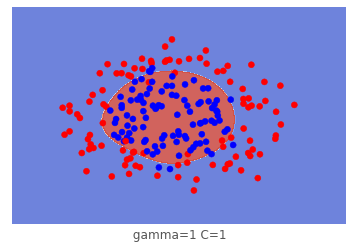

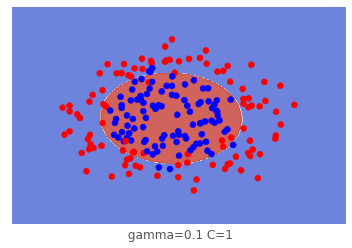

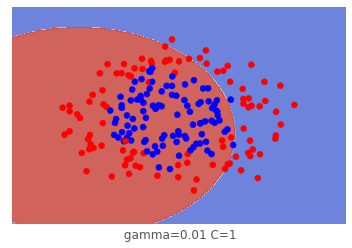

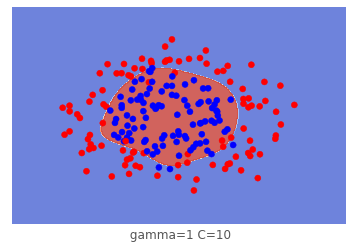

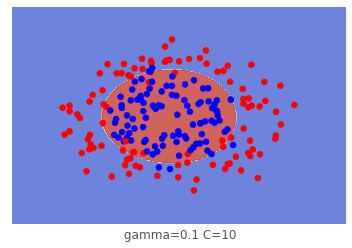

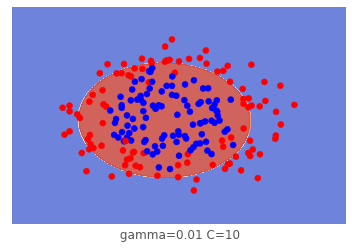

In [61]:
x_min, x_max = X1[:,0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:,1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, C in enumerate((0.1, 1, 10)):
    for j, gamma in enumerate((1, 0.1, 0.01)):
        plt.subplot()
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X1,y1)
        Z = clf.fit(X1,y1)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # 绘制整个背景图

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=cm_bright)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(" gamma=" + str(gamma) + " C=" + str(C))
        plt.show()

1
0.1
0.01
